In [2]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\user\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Thu Nov  6 10:26:05 2025).


In [3]:
df_DA_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [4]:
df_DA_us = df_DA_us.dropna(subset=['salary_year_avg'])

In [16]:
df_DA_us_exploded = df_DA_us.explode('job_skills')
df_DA_skills = df_DA_us_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10)
df_DA_skills = df_DA_skills.rename(columns={'count': 'skills_count', 'median': 'salary_year_median'})

In [19]:
df_DA_skills

DA_job_count = len(df_DA_us)
df_DA_skills['skills_percent']= (df_DA_skills['skills_count'] / DA_job_count) * 100

skill_percent = 5
df_DA_skills = df_DA_skills[df_DA_skills['skills_percent'] > skill_percent]

df_DA_skills

,skills_count,salary_year_median,skills_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


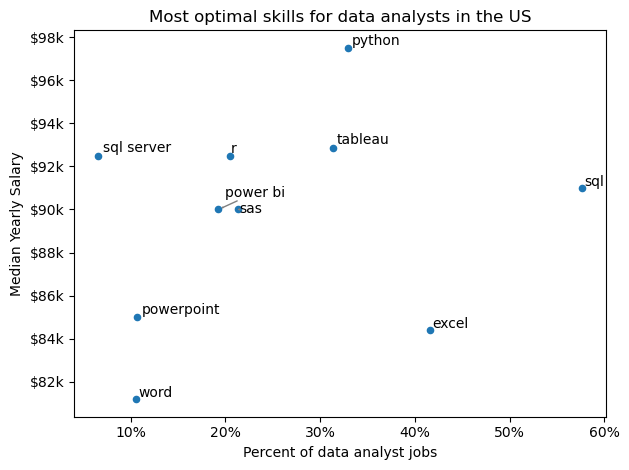

In [31]:
from adjustText import adjust_text

df_DA_skills.plot(kind='scatter', x='skills_percent', y='salary_year_median')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills.index):
    texts.append(plt.text(df_DA_skills['skills_percent'].iloc[i], df_DA_skills['salary_year_median'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of data analyst jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most optimal skills for data analysts in the US')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, loc: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x)}%'))
# Adjust layout and display plot 
plt.tight_layout()
plt.show()